In [1]:
import pandas as pd

In [2]:
metadata_filename = "./corpora/FirstWeek-March-Tweets-Meta.csv"
doc_topic_matrix_filename = "./models/FirstWeek-March-Tweets-50topics-dtm.csv"
# Read back data from csv files
metadata = pd.read_csv(metadata_filename)
dtm = pd.read_csv(doc_topic_matrix_filename)

In [3]:
# Reorient from long to wide
dtm = dtm.pivot(index='position_index', columns='topic_id',\
               values='topic_weight').fillna(0)

# Normalize each row as a valid probability distribution
dtm = dtm.div(dtm.sum(axis=1), axis=0)

In [4]:
df = dtm.merge(metadata, on="position_index", how="left")

In [5]:
df['Date'] = pd.to_datetime(df['created_time'])
df = df.set_index('Date')

In [19]:
df.shape

(2000, 53)

In [10]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

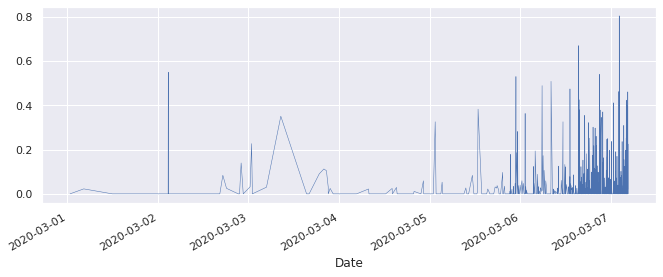

In [13]:
df.loc['2020-03-01':'2020-03-07',5].plot(linewidth=0.5);

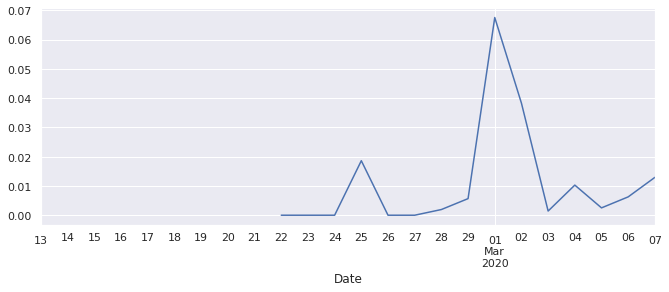

In [18]:
df[9].resample('D').mean().plot()

## https://jeriwieringa.com/2017/06/30/calculating-and-visualizing-topic-significance-over-time-part-3/

In [4]:
# Shift back to a long dataframe
dtm = dtm.stack().reset_index()
dtm.columns = ['position_index', 'topic_id', 'norm_topic_weight']

# compile dataframes as one composit dataframe
df = dtm.merge(metadata, on="position_index", how="left")

In [5]:
df.head(20)

,position_index,topic_id,norm_topic_weight,id_str,created_time
0,0,0,0.078974,1236138373988794368,2020-03-07 03:55:29
1,0,1,0.000000,1236138373988794368,2020-03-07 03:55:29
2,0,2,0.000000,1236138373988794368,2020-03-07 03:55:29
3,0,3,0.000000,1236138373988794368,2020-03-07 03:55:29
4,0,4,0.000000,1236138373988794368,2020-03-07 03:55:29
5,0,5,0.000000,1236138373988794368,2020-03-07 03:55:29
6,0,6,0.000000,1236138373988794368,2020-03-07 03:55:29
7,0,7,0.022564,1236138373988794368,2020-03-07 03:55:29
8,0,8,0.000000,1236138373988794368,2020-03-07 03:55:29
9,0,9,0.000000,1236138373988794368,2020-03-07 03:55:29
